# Champion Analysis Prototype v1.1
*This notebook is a prototype meant to focus on purely visualizing the data extracted from Prototype v1.0.*
*The extracted data is stored in the following files in the "Data Extract" Folder:*
* *Legendary and Mythical Pokemon.csv*
* *Pokemon Dataframe.csv*
* *Regular Pokemon.csv*

*The visualizations crafted in this notebook may or may not be used in the final product and will be contained in the "Visualizations" Folder.*


### Data Imports and Set Up

In [16]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from pandas.plotting import scatter_matrix

In [17]:
# Import data from CSVs - All Pokemon
all_pokemon = pd.read_csv("Data Extract/Pokemon Dataframe.csv")
all_pokemon

,name,type,hp,attack,defense,special_attack,special_defense,speed
0,bulbasaur,"['grass', 'poison']",45,49,49,65,65,45
1,ivysaur,"['grass', 'poison']",60,62,63,80,80,60
2,venusaur,"['grass', 'poison']",80,82,83,100,100,80
3,charmander,['fire'],39,52,43,60,50,65
4,charmeleon,['fire'],58,64,58,80,65,80
...,...,...,...,...,...,...,...,...
893,regieleki,['electric'],80,100,50,100,50,200
894,regidrago,['dragon'],200,100,50,100,50,80
895,glastrier,['ice'],100,145,130,65,110,30
896,spectrier,['ghost'],100,65,60,145,80,130


In [18]:
# Import data from CSVs - Legendary and Mythical Pokemon
elite_pokemon = pd.read_csv("Data Extract/Legendary and Mythical Pokemon.csv")
elite_pokemon

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Articuno,"['ice', 'flying']",90,85,100,95,125,85,580,True,False
1,Zapdos,"['electric', 'flying']",90,90,85,125,90,100,580,True,False
2,Moltres,"['fire', 'flying']",90,100,90,125,85,90,580,True,False
3,Mewtwo,['psychic'],106,110,90,154,90,130,680,True,False
4,Mew,['psychic'],100,100,100,100,100,100,600,False,True
...,...,...,...,...,...,...,...,...,...,...,...
75,Regieleki,['electric'],80,100,50,100,50,200,580,True,False
76,Regidrago,['dragon'],200,100,50,100,50,80,580,True,False
77,Glastrier,['ice'],100,145,130,65,110,30,580,True,False
78,Spectrier,['ghost'],100,65,60,145,80,130,580,True,False


In [19]:
# Import data from CSVs - Regular Pokemon
regular_pokemon = pd.read_csv("Data Extract/Regular Pokemon.csv")
regular_pokemon

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Bulbasaur,"['grass', 'poison']",45,49,49,65,65,45,318,False,False
1,Ivysaur,"['grass', 'poison']",60,62,63,80,80,60,405,False,False
2,Venusaur,"['grass', 'poison']",80,82,83,100,100,80,525,False,False
3,Charmander,['fire'],39,52,43,60,50,65,309,False,False
4,Charmeleon,['fire'],58,64,58,80,65,80,405,False,False
...,...,...,...,...,...,...,...,...,...,...,...
813,Arctovish,"['water', 'ice']",90,90,100,80,90,55,505,False,False
814,Duraludon,"['steel', 'dragon']",70,95,115,120,50,85,535,False,False
815,Dreepy,"['dragon', 'ghost']",28,60,30,40,30,82,270,False,False
816,Drakloak,"['dragon', 'ghost']",68,80,50,60,50,102,410,False,False


## Data Visualization
*This chapter will focus on visualizing different aspects of each dataframe to allow for better presentation of our final report.*

The outliers are [200 400 300 385]
The outlier pokemon are ['Cosmog' 'Cosmoem' 'Meltan' 'Kubfu']
The min is 200 and the pokemon is Cosmog
The max is 720 and the pokemon is Arceus


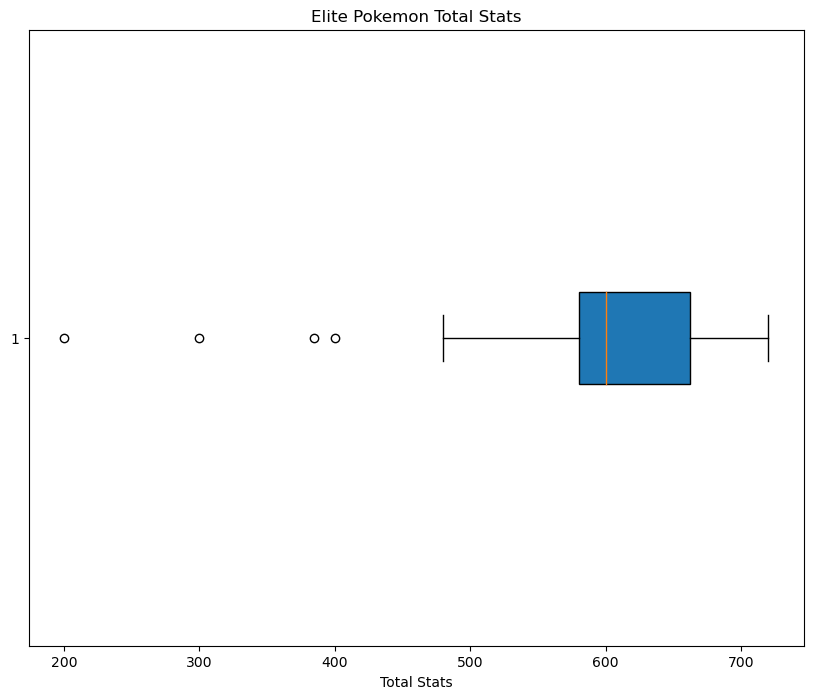

In [21]:
# Top Stats Comparison for Elite Pokemon
plt.figure(figsize=(10, 8))

# Create boxplot and capture returned object
box_plot = plt.boxplot(elite_pokemon['Total Stats'], patch_artist=True, showfliers=True, vert=False)

# Title and labels
plt.title('Elite Pokemon Total Stats')
plt.xlabel('Total Stats')

# Get the outliers 
outliers = box_plot['fliers'][0].get_data()[0]
outlier_pokemon = elite_pokemon[elite_pokemon['Total Stats'].isin(outliers)]

# Get min and max
min_value = np.min(elite_pokemon['Total Stats'])
max_value = np.max(elite_pokemon['Total Stats'])
min_pokemon = elite_pokemon[elite_pokemon['Total Stats'] == min_value]['Name'].values[0]
max_pokemon = elite_pokemon[elite_pokemon['Total Stats'] == max_value]['Name'].values[0]

# Print the outliers
print(f'The outliers are {outliers}')
print(f'The outlier pokemon are {outlier_pokemon["Name"].values}')

# Print the min and max
print(f'The min is {min_value} and the pokemon is {min_pokemon}')
print(f'The max is {max_value} and the pokemon is {max_pokemon}')

# Save the figure
plt.savefig('Visualizations/Elite Pokemon Total Stats.png')

# Display the plot
plt.show()


The outliers are []
The outlier pokemon are []
The min is 175 and the pokemon is Wishiwashi-solo
The max is 670 and the pokemon is Slaking


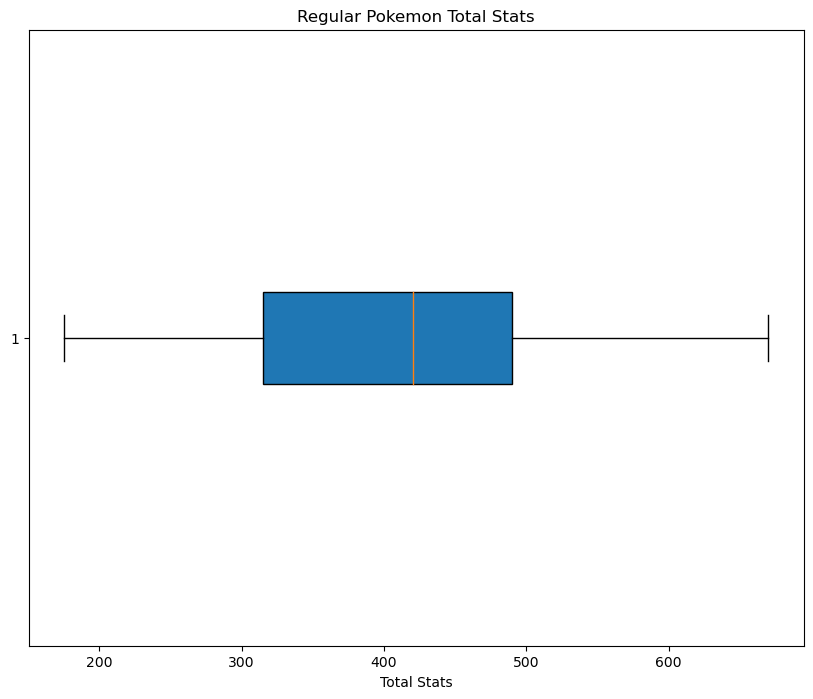

In [22]:
# Top Stats Comparison for Regular Pokemon
plt.figure(figsize=(10, 8))

# Create boxplot and capture returned object
box_plot = plt.boxplot(regular_pokemon['Total Stats'], patch_artist=True, showfliers=True, vert=False)

# Title and labels
plt.title('Regular Pokemon Total Stats')
plt.xlabel('Total Stats')

# Get the outliers
outliers = box_plot['fliers'][0].get_data()[0]
outlier_pokemon = regular_pokemon[regular_pokemon['Total Stats'].isin(outliers)]

# Get min and max
min_value = np.min(regular_pokemon['Total Stats'])
max_value = np.max(regular_pokemon['Total Stats'])
min_pokemon = regular_pokemon[regular_pokemon['Total Stats'] == min_value]['Name'].values[0]
max_pokemon = regular_pokemon[regular_pokemon['Total Stats'] == max_value]['Name'].values[0]

# Print the outliers
print(f'The outliers are {outliers}')
print(f'The outlier pokemon are {outlier_pokemon["Name"].values}')

# Print the min and max
print(f'The min is {min_value} and the pokemon is {min_pokemon}')
print(f'The max is {max_value} and the pokemon is {max_pokemon}')

# Save the figure
plt.savefig('Visualizations/Regular Pokemon Total Stats.png')

# Display the plot
plt.show()

In [23]:
# Assemble list of Top Five Highest and Lowest Total Stats for Elite Pokemon
elite_pokemon = elite_pokemon.sort_values('Total Stats', ascending=False)
elite_pokemon = elite_pokemon.reset_index(drop=True)
elite_pokemon


,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Arceus,['normal'],120,120,120,120,120,120,720,False,True
1,Eternatus,"['poison', 'dragon']",140,85,95,145,95,130,690,True,False
2,Palkia,"['water', 'dragon']",90,120,100,150,120,100,680,True,False
3,Giratina-altered,"['ghost', 'dragon']",150,100,120,100,120,90,680,True,False
4,Dialga,"['steel', 'dragon']",100,120,120,150,100,90,680,True,False
...,...,...,...,...,...,...,...,...,...,...,...
75,Phione,['water'],80,80,80,80,80,80,480,False,True
76,Cosmoem,['psychic'],43,29,131,29,131,37,400,True,False
77,Kubfu,['fighting'],60,90,60,53,50,72,385,True,False
78,Meltan,['steel'],46,65,65,55,35,34,300,False,True


In [24]:
# Assemble list of Top Five Highest and Lowest Total Stats for Regular Pokemon
regular_pokemon = regular_pokemon.sort_values('Total Stats', ascending=False)
regular_pokemon = regular_pokemon.reset_index(drop=True)
regular_pokemon

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Slaking,['normal'],150,160,100,95,65,100,670,False,False
1,Goodra,['dragon'],90,100,70,110,150,80,600,False,False
2,Dragonite,"['dragon', 'flying']",91,134,95,100,100,80,600,False,False
3,Tyranitar,"['rock', 'dark']",100,134,110,95,100,61,600,False,False
4,Kommo-o,"['dragon', 'fighting']",75,110,125,100,105,85,600,False,False
...,...,...,...,...,...,...,...,...,...,...,...
813,Azurill,"['normal', 'fairy']",50,20,40,20,40,20,190,False,False
814,Snom,"['ice', 'bug']",30,25,35,45,30,20,185,False,False
815,Sunkern,['grass'],30,30,30,30,30,30,180,False,False
816,Blipbug,['bug'],25,20,20,25,45,45,180,False,False


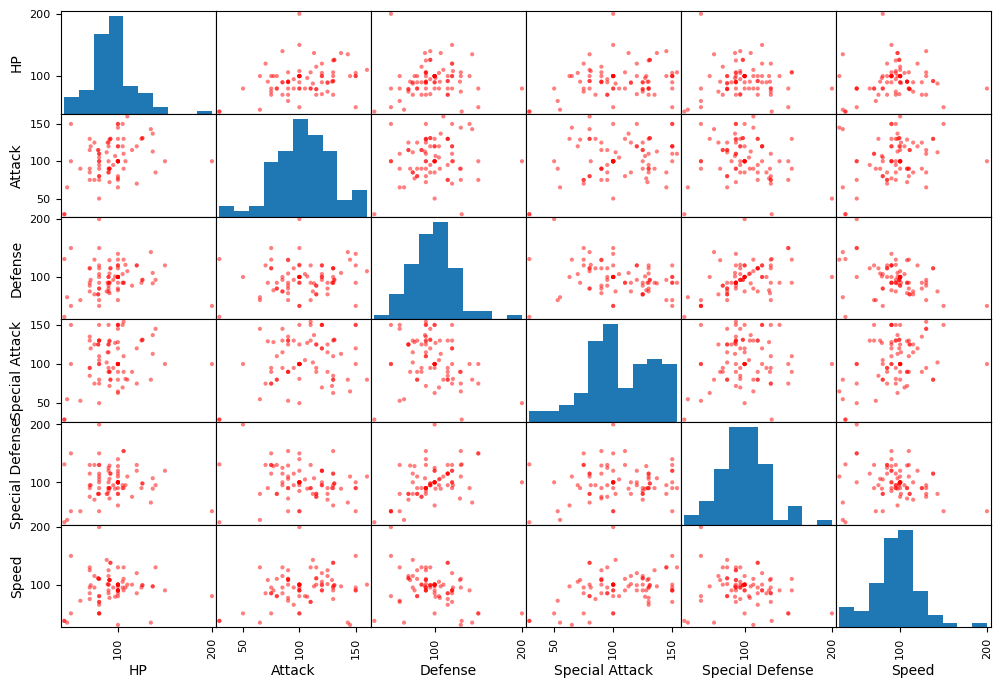

In [25]:
# Scatter Matrix for Elite Pokemon
from pandas.plotting import scatter_matrix
features = ["HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
scatter_matrix(elite_pokemon[features], figsize=(12,8), color='red')

# Save the figure
plt.savefig('Visualizations/Elite Pokemon Scatter Matrix.png')

# Display the plot
plt.show()

In [26]:
# Correlation Matrix for Elite Pokemon
correlation_matrix = elite_pokemon[features].corr()
correlation_matrix

,HP,Attack,Defense,Special Attack,Special Defense,Speed
HP,1.000000,0.322487,0.082519,0.221722,0.014519,0.122585
Attack,0.322487,1.000000,0.131024,0.283085,-0.170123,0.265479
Defense,0.082519,0.131024,1.000000,-0.253125,0.457733,-0.366852
Special Attack,0.221722,0.283085,-0.253125,1.000000,0.111204,0.383949
Special Defense,0.014519,-0.170123,0.457733,0.111204,1.000000,-0.187087
Speed,0.122585,0.265479,-0.366852,0.383949,-0.187087,1.000000


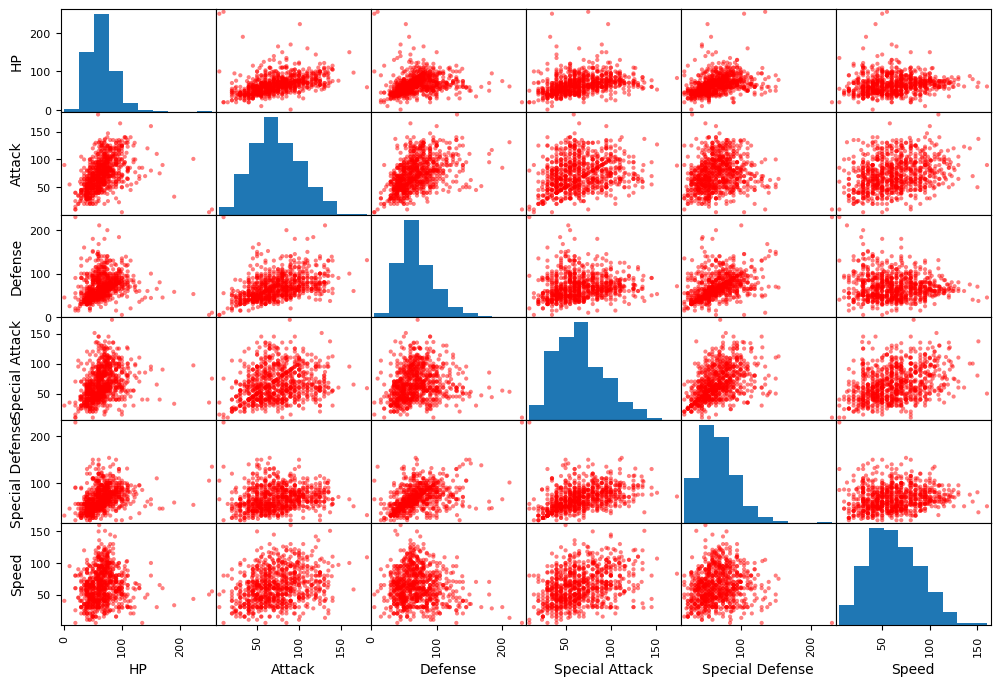

In [27]:
# Scatter Matrix for Regular Pokemon
features = ["HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
scatter_matrix(regular_pokemon[features], figsize=(12,8), color='red')

# Save the figure
plt.savefig('Visualizations/Regular Pokemon Scatter Matrix.png')

# Display the plot
plt.show()

In [28]:
# Correlation Matrix for Regular Pokemon
correlation_matrix = regular_pokemon[features].corr()
correlation_matrix

,HP,Attack,Defense,Special Attack,Special Defense,Speed
HP,1.000000,0.412882,0.202381,0.307857,0.319200,0.094361
Attack,0.412882,1.000000,0.430333,0.232437,0.153570,0.270921
Defense,0.202381,0.430333,1.000000,0.136444,0.457233,-0.089864
Special Attack,0.307857,0.232437,0.136444,1.000000,0.450582,0.347437
Special Defense,0.319200,0.153570,0.457233,0.450582,1.000000,0.126087
Speed,0.094361,0.270921,-0.089864,0.347437,0.126087,1.000000
